In [2]:
# Importing the ASPEN+ Simulation:
from SimulationEnv2 import Simulator
# Importing the Keras Libraries
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
# Importing the Keras Extention Libraries
from rl.agents.dqn import DQNAgent
from rl.policy import EpsGreedyQPolicy, LinearAnnealedPolicy
from rl.memory import SequentialMemory
from rl.callbacks import ModelIntervalCheckpoint, FileLogger
# Importing the Auxiliary Libraries
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
STEPS = 100_000
WARMUP_STEPS = 1000
MEMORY_LIMIT = 200_000
DISCOUNT = 0.99
LEARNING_RATE = 0.001

In [4]:
# Initializing the Environement
env = Simulator()
nb_actions = env.action_space.n # Number of Possible Action (CSTR or PFR)

In [5]:
model = Sequential() # Sequential model
model.add(Flatten(input_shape=(1,) + env.observation_space.shape))
model.add(Dense(128,activation="relu"))  #16x3 Relu Dense Layer
model.add(Dense(64,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(nb_actions,activation="linear")) #activation is black and white 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 5)                 0         
_________________________________________________________________
dense (Dense)                (None, 64)                384       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 325       
Total params: 9,029
Trainable params: 9,029
Non-trainable params: 0
_________________________________________________________________


In [7]:
policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr="eps", value_max=1, value_min=0.05, value_test=0, nb_steps=STEPS)
memory = SequentialMemory(limit=MEMORY_LIMIT, window_length=1)
optimizer = Adam(lr=LEARNING_RATE)

dqn = DQNAgent(model=model, nb_actions=nb_actions, memory=memory, nb_steps_warmup=WARMUP_STEPS, target_model_update=1e-2,policy=policy, gamma=DISCOUNT)
dqn.compile(optimizer=optimizer, metrics=["mae"])


In [8]:
w_file = "C:/Users/s2199718/Desktop/Second Case Example/ModelWeights/Backups/dqn-{step:02d}_weights.h5f"
check_w_file = "C:/Users/s2199718/Desktop/Second Case Example/ModelWeights/Backups/train_w-{step:02d}_weights.h5f"


log_file = "C:/Users/s2199718/Desktop/Second Case Example/ModelWeights/Logs/training_w_-{step:02d}_log.json"
callbacks = [ModelIntervalCheckpoint(check_w_file, interval=1000)]
callbacks += [FileLogger(log_file, interval=100)]


hist = dqn.fit(env, callbacks=callbacks, nb_steps=STEPS,log_interval=10_000)
reward_data = np.array(hist.history["episode_reward"])
print(hist.history.keys())

Training for 100000 steps ...
Interval 1 (0 steps performed)


C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


 1408/10000 [===>..........................] - ETA: 33:46 - reward: -8.1624e-04 TC_TEMP: [[365.0, 345.0, 350.0, 350.0]||0.01]


 4045/10000 [===========>..................] - ETA: 25:52 - reward: 5.8004e-05 TC_TEMP: [[370.0, 350.0, 360.0, 350.0]||0.01]


 6879/10000 [===================>..........] - ETA: 14:16 - reward: 8.6107e-04 TC_TEMP: [[350.0, 350.0, 355.0, 360.0]||0.00]


 8274/10000 [=======================>......] - ETA: 8:18 - reward: 0.0011 TC_TEMP: [[340.0, 350.0, 350.0, 330.0]||0.00]


10000/10000 [==============================] - 3001s 300ms/step - reward: 0.0018
474 episodes - episode_reward: 0.036 [-3.990, 0.778] - loss: 0.003 - mae: 0.084 - mean_q: 0.116 - mean_eps: 0.948

Interval 2 (10000 steps performed)
 1203/10000 [==>...........................] - ETA: 53:49 - reward: 0.0024 TC_TEMP: [[360.0, 405.0, 360.0, 365.0]||0.77]


 2910/10000 [=======>......................] - ETA: 38:44 - reward: 0.0020 TC_TEMP: [[400.0, 370.0, 355.0, 390.0]||0.78]


 6214/10000 [=================>............] - ETA: 20:54 - reward: 0.0011 TC_TEMP: [[365.0, 325.0, 360.0, 350.0]||0.01]


 9092/10000 [==========================>...] - ETA: 4:47 - reward: 0.0016 TC_TEMP: [[360.0, 360.0, 350.0, 340.0]||0.01]


10000/10000 [==============================] - 3171s 317ms/step - reward: 0.0020
425 episodes - episode_reward: 0.049 [-4.998, 0.776] - loss: 0.141 - mae: 1.463 - mean_q: 1.927 - mean_eps: 0.858

Interval 3 (20000 steps performed)
 2475/10000 [======>.......................] - ETA: 42:30 - reward: 9.5384e-04 TC_TEMP: [[360.0, 380.0, 345.0, 315.0]||0.03]


 4070/10000 [===========>..................] - ETA: 33:53 - reward: 0.0024 TC_TEMP: [[355.0, 355.0, 365.0, 340.0]||0.01]


 5621/10000 [===============>..............] - ETA: 24:05 - reward: 0.0021 TC_TEMP: [[350.0, 345.0, 370.0, 360.0]||0.01]


 7230/10000 [====================>.........] - ETA: 15:30 - reward: 0.0030 TC_TEMP: [[350.0, 350.0, 355.0, 335.0]||0.00]


10000/10000 [==============================] - 3379s 338ms/step - reward: 0.0023
422 episodes - episode_reward: 0.052 [-6.998, 0.902] - loss: 0.119 - mae: 2.201 - mean_q: 2.888 - mean_eps: 0.763

Interval 4 (30000 steps performed)
  366/10000 [>.............................] - ETA: 54:41 - reward: -7.7799e-06 TC_TEMP: [[345.0, 360.0, 340.0, 335.0]||0.00]


 3781/10000 [==========>...................] - ETA: 36:40 - reward: -4.9131e-04 TC_TEMP: [[395.0, 350.0, 350.0, 345.0]||0.75]


 5541/10000 [===============>..............] - ETA: 26:30 - reward: 0.0018 TC_TEMP: [[365.0, 360.0, 335.0, 335.0]||0.01]


 8847/10000 [=========================>....] - ETA: 6:50 - reward: 7.9560e-04 TC_TEMP: [[350.0, 350.0, 365.0, 355.0]||0.01]


10000/10000 [==============================] - 3599s 360ms/step - reward: 0.0021
390 episodes - episode_reward: 0.054 [-9.998, 0.942] - loss: 0.083 - mae: 1.926 - mean_q: 2.532 - mean_eps: 0.668

Interval 5 (40000 steps performed)
  571/10000 [>.............................] - ETA: 51:11 - reward: 0.0133 TC_TEMP: [[395.0, 390.0, 340.0, 350.0]||0.75]


 2252/10000 [=====>........................] - ETA: 46:10 - reward: 0.0138 TC_TEMP: [[390.0, 360.0, 360.0, 330.0]||0.21]


 4077/10000 [===========>..................] - ETA: 34:35 - reward: 0.0147 TC_TEMP: [[385.0, 350.0, 585.0, 375.0]||0.49]


 7885/10000 [======================>.......] - ETA: 12:42 - reward: 0.0132 TC_TEMP: [[350.0, 355.0, 365.0, 600.0]||0.44]


10000/10000 [==============================] - 3619s 362ms/step - reward: 0.0134
363 episodes - episode_reward: 0.371 [-7.360, 0.964] - loss: 14.141 - mae: 10.472 - mean_q: 14.456 - mean_eps: 0.573

Interval 6 (50000 steps performed)
 2085/10000 [=====>........................] - ETA: 50:53 - reward: 0.0105 TC_TEMP: [[375.0, 375.0, 345.0, 390.0]||0.08]


 4712/10000 [=============>................] - ETA: 35:18 - reward: 0.0099 TC_TEMP: [[340.0, 345.0, 360.0, 470.0]||0.66]


 7772/10000 [======================>.......] - ETA: 14:52 - reward: 0.0103 TC_TEMP: [[380.0, 340.0, 470.0, 475.0]||0.90]


10000/10000 [==============================] - 4097s 410ms/step - reward: 0.0107
250 episodes - episode_reward: 0.426 [-1.224, 0.950] - loss: 24338.652 - mae: 679.840 - mean_q: 921.478 - mean_eps: 0.478

Interval 7 (60000 steps performed)
  705/10000 [=>............................] - ETA: 1:00:22 - reward: 0.0039 TC_TEMP: [[380.0, 355.0, 355.0, 485.0]||0.65]


 4057/10000 [===========>..................] - ETA: 44:38 - reward: 0.0066 TC_TEMP: [[315.0, 365.0, 380.0, 495.0]||0.63]


 7689/10000 [======================>.......] - ETA: 16:58 - reward: 0.0084 TC_TEMP: [[300.0, 370.0, 380.0, 435.0]||0.73]


10000/10000 [==============================] - 4461s 446ms/step - reward: 0.0082
194 episodes - episode_reward: 0.424 [-14.560, 0.972] - loss: 1550816.637 - mae: 7002.658 - mean_q: 9453.766 - mean_eps: 0.383

Interval 8 (70000 steps performed)
 1125/10000 [==>...........................] - ETA: 59:09 - reward: 0.0124 TC_TEMP: [[360.0, 380.0, 600.0, 430.0]||0.88]


 5428/10000 [===============>..............] - ETA: 36:49 - reward: -3.1413e-04 TC_TEMP: [[400.0, 350.0, 440.0, 410.0]||0.94]


10000/10000 [==============================] - 4729s 473ms/step - reward: -4.4482e-04
147 episodes - episode_reward: -0.030 [-28.213, 0.964] - loss: 19574211.786 - mae: 29485.670 - mean_q: 39765.517 - mean_eps: 0.288

Interval 9 (80000 steps performed)
 6199/10000 [=================>............] - ETA: 34:12 - reward: -0.0098 TC_TEMP: [[500.0, 600.0, 405.0, 640.0]||0.65]


10000/10000 [==============================] - 5481s 548ms/step - reward: -0.0162
101 episodes - episode_reward: -1.611 [-35.141, 0.962] - loss: 110531292.906 - mae: 76924.590 - mean_q: 104304.437 - mean_eps: 0.193

Interval 10 (90000 steps performed)
10000/10000 [==============================] - 5581s 558ms/step - reward: -0.0615
done, took 41116.225 seconds
dict_keys(['episode_reward', 'nb_episode_steps', 'nb_steps'])


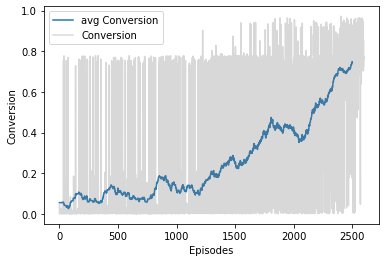

In [20]:
CONV_MAT = np.array(env.CONVERSION_MATRIX)
CONV = CONV_MAT[0:2600]


def running_mean(x, episode_number):
    cumsum = np.cumsum(np.insert(x, 0, 0))
    return (cumsum[episode_number:] - cumsum[:-episode_number]) / episode_number
smoothed_rews = running_mean(CONV,100)

plt.plot(np.arange(np.shape(smoothed_rews)[0])[-len(smoothed_rews):], smoothed_rews)
plt.plot(np.arange(np.shape(CONV)[0]), CONV, color='grey', alpha=0.3)
plt.xlabel("Episodes")
plt.ylabel("Conversion")
plt.legend(["avg Conversion", "Conversion"], loc=2)
plt.savefig('convesion.png', dpi=300,bbox_inches="tight" )

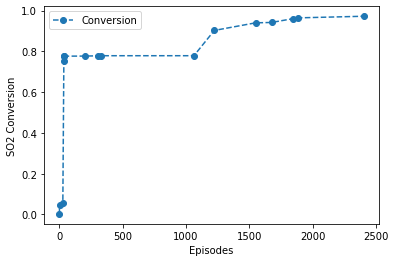

In [28]:
Episodes = [0, 1, 27, 35, 38, 40, 199, 308, 331, 1062, 1223, 1549, 1675, 1841, 1883, 2403]
Conv = [0.00270,0.04755, 0.05691, 0.7549, 0.775839, 0.77628, 0.776637, 0.77800, 0.77843, 0.778478, 0.9024, 0.9397, 0.9415, 0.9598, 0.964022, 0.9720]

plt.plot(Episodes, Conv,"--o")
plt.xlabel("Episodes")
plt.ylabel("SO2 Conversion")
plt.legend([ "Conversion"], loc=2)
plt.savefig('reward.png', dpi=300,bbox_inches="tight" )

In [12]:
env.BEST_CASE

[[[330.0, 345.0, 355.0, 350.0], 0.002704565219981259, 0],
 [[365.0, 340.0, 355.0, 385.0], 0.04755130511442843, 1],
 [[385.0, 350.0, 350.0, 340.0], 0.05691688607202856, 27],
 [[395.0, 350.0, 350.0, 355.0], 0.7549761993828852, 35],
 [[400.0, 365.0, 365.0, 360.0], 0.7758395072612254, 38],
 [[350.0, 400.0, 350.0, 370.0], 0.7762889532875064, 40],
 [[355.0, 400.0, 345.0, 340.0], 0.7766371347049643, 199],
 [[370.0, 350.0, 380.0, 405.0], 0.778003211856229, 308],
 [[370.0, 340.0, 340.0, 400.0], 0.7784374504104171, 331],
 [[370.0, 360.0, 310.0, 400.0], 0.7784787137087646, 1062],
 [[350.0, 410.0, 360.0, 490.0], 0.9024284516136718, 1223],
 [[395.0, 380.0, 440.0, 375.0], 0.9397950499767688, 1549],
 [[405.0, 445.0, 355.0, 405.0], 0.9415673338376678, 1675],
 [[415.0, 475.0, 440.0, 350.0], 0.9598249515124079, 1841],
 [[400.0, 350.0, 440.0, 460.0], 0.9640226648518567, 1883],
 [[440.0, 460.0, 445.0, 450.0], 0.9720086611706119, 2403]]

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(env.CONVERSION_MATRIX).T
df.to_excel(excel_writer = 'C:/Users/s2199718/Desktop/Second Case Example/ExportedExcelData/ConversionData.xlsx')